<a href="https://colab.research.google.com/github/kashyapraval/AIexperiments/blob/master/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATION ON IMAGE COMPRESSION**

# INTRODUCTION

In [0]:
import matplotlib.image as mpimg
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
from PIL import Image
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
pic = Image.open('/content/drive/My Drive/120___05/IMG_6636.JPG')
st_info = os.stat('/content/drive/My Drive/120___05/IMG_6636.JPG')
st_info.st_size # filesize in bytes

694372

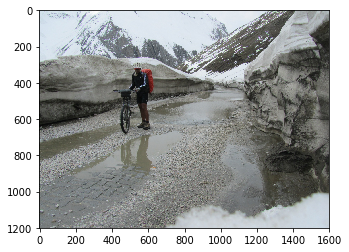

In [6]:
plt.imshow(pic)

My timer-selfie from the solo Indian Ride taken at Zojila moments before a blizzard

In [10]:
pic_np = np.array(pic)
pic_np.shape

(1200, 1600, 3)

# SINGULAR VALUE DECOMPOSITION

In [0]:
U0,S0,V0 = np.linalg.svd(pic_np[:,:,0])
U1,S1,V1 = np.linalg.svd(pic_np[:,:,1])
U2,S2,V2 = np.linalg.svd(pic_np[:,:,2])

shape of U (1200,1200), S(1200), V(1600,1600)  

In [12]:
print(len(S0[S0>100]),len(S1[S1>100]),len(S2[S2>100])) # get a rough idea of correlation between diagonal values of S across frames. Does this happen because frames are correlated?

881 880 883


Number of numbers stored initially : 1200 X 1600 X 3 = 5760000. Since the range of these were 0 to 255, we could say 5.76e+6 bytes (JPEG typically attains 10:1 compression and hence the file size was 6.94e+5 bytes)

In [16]:
print(U.shape, S.shape, V.shape) # S ~ 1D array (just the elements corresponding to the diagonal)

(1200, 1200) (1200,) (1600, 1600)


In [0]:
s0 = S0[:600]
_s0 = np.diag(s0)
_ = np.matmul(U0[:,:600],_s0)
recon_pic0 = np.matmul(_,V0[:600,:])

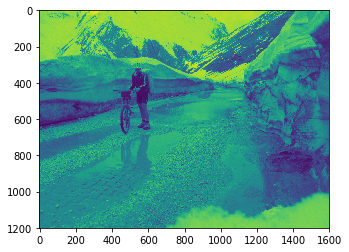

In [23]:
plt.imshow(recon_pic0)

Thats just one frame. Let's pick up all the frames.

In [0]:
_s1 = np.diag(S1[:600])
_s2 = np.diag(S2[:600])
_ = np.matmul(U1[:,:600],_s1)
recon_pic1 = np.matmul(_,V1[:600,:])
_ = np.matmul(U2[:,:600],_s2)
recon_pic2 = np.matmul(_,V2[:600,:])

In [0]:
recon_pic = pic_np.copy()
recon_pic[:,:,0] = recon_pic0 
recon_pic[:,:,1] = recon_pic1 
recon_pic[:,:,2] = recon_pic2 

In [33]:
np.linalg.norm(recon_pic - pic_np) # difference per pixel is ~ 0.7. If the errors of this approximation were evenly distributed, we would fail to notice any difference.

430730.1444767942

Significant amount of difference in terms of norm. Yet I do not see much drop in quality! Observe the change in numbers over a random section of the image?

In [30]:
pic_np[400:410, 400:410,0]

array([[102,  96,  97,  96,  87,  84,  92,  98,  98,  99],
       [ 99,  96,  96,  96,  92,  89,  93,  98,  96,  98],
       [ 96,  96,  95,  97,  98,  95,  94,  97,  97, 100],
       [ 94,  97,  96,  98, 102,  99,  95,  98, 100, 103],
       [ 92,  97,  97,  98, 102, 101,  99, 101, 102, 104],
       [ 93,  96,  98,  98, 100, 102, 102, 103, 103, 104],
       [ 97,  97,  99,  98,  98, 101, 103, 100, 102, 103],
       [101,  99, 100,  99,  96, 100, 102,  96, 100, 101],
       [102, 102, 100,  98,  99, 101,  99,  96, 100, 101],
       [104, 103, 102, 103, 102, 100, 100, 102, 105, 106]], dtype=uint8)

In [31]:
recon_pic[400:410, 400:410,0]

array([[103,  93,  94,  98,  90,  82,  89,  99, 100, 100],
       [100,  95,  93,  94,  94,  87,  92,  96,  97,  96],
       [ 94,  96,  94,  95,  95,  95,  95,  95,  97, 100],
       [ 92,  96,  97,  99, 101, 100,  93,  95, 100, 103],
       [ 94,  98,  97,  96, 103, 102,  98, 100, 101, 104],
       [ 96,  97,  94,  96, 101, 102, 104, 103, 100, 103],
       [ 95,  97,  97,  98,  96, 100, 101, 100, 103, 103],
       [ 97,  98, 102,  99,  95, 101, 100,  95, 103, 100],
       [101, 101, 100,  98,  98,  99, 100,  95, 100,  99],
       [105, 103, 101, 103, 103,  99,  99, 103, 106, 107]], dtype=uint8)

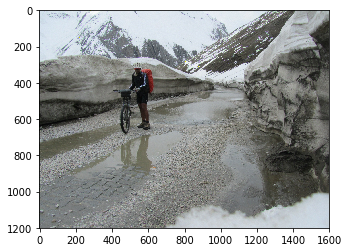

In [32]:
plt.imshow(recon_pic)

How much space do we need to store per frame:

U : 1200 X 600

V:  600 X 1600

S:  600

i.e.  1680600 or 1.68e+6 X 3 frames ~ 5e+6 ( doesn't seem much because we  chose 600 out of 1200 diagonal elements. Choosing fewer diagonal elements would yield more compression.)

# FOURIER TRANSFORM

The JPEG compression makes use of Discrete Cosine Transform. Shall be testing out the same.